In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import zipfile

# Misalnya nama file zip yang di-upload adalah 'dataset.zip'
zip_file = 'animals10_anotated.zip'
extract_folder = '/content/animals10_anotated'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Verifikasi isi folder setelah diekstrak
import os
print(os.listdir(extract_folder))

['animals10_anotasi']


## Splitting Data

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Direktori utama tempat dataset dan anotasi
dataset_dir = "/content/animals10_anotated/animals10_anotasi"
categories = ['Kucing', 'Anjing', 'Gajah', 'Tupai', 'Sapi', 'Kuda', 'Kupu-kupu', 'Domba', 'Ayam', 'Laba-laba']

# Lokasi folder pembagian data
base_dir = "/content/dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Membuat direktori pembagian jika belum ada
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

    # Membuat sub-direktori untuk masing-masing kelas
    for category in categories:
        os.makedirs(os.path.join(folder, category), exist_ok=True)

# Melakukan pembagian data untuk tiap kelas
for category in categories:
    category_path = os.path.join(dataset_dir, category)

    # Validasi apakah folder kategori ada
    if not os.path.exists(category_path):
        print(f"Warning: Directory for category '{category}' does not exist. Skipping...")
        continue

    # Mengambil file gambar dan anotasi untuk kategori ini (mengabaikan classes.txt)
    images = [f for f in os.listdir(category_path) if f.endswith(".jpeg") and f != "classes.txt"]
    annotations = [f.replace('.jpeg', '.txt') for f in images]

    # Periksa apakah ada pasangan gambar dan anotasi yang valid
    valid_files = [(img, annot) for img, annot in zip(images, annotations)
                   if os.path.exists(os.path.join(category_path, img)) and
                   os.path.exists(os.path.join(category_path, annot))]

    if not valid_files:
        print(f"Warning: No valid image-annotation pairs found in {category_path}. Skipping this category.")
        continue

    # Memisahkan gambar dan anotasi yang valid
    images, annotations = zip(*valid_files)

    # Membagi dataset menjadi train, val, test (70%, 15%, 15%)
    img_train, img_temp, annot_train, annot_temp = train_test_split(
        images, annotations, test_size=0.3, random_state=42
    )
    img_val, img_test, annot_val, annot_test = train_test_split(
        img_temp, annot_temp, test_size=0.5, random_state=42
    )

    # Fungsi untuk memindahkan file gambar dan anotasi
    def move_files(file_list, annot_list, dest_dir):
        for img, annot in zip(file_list, annot_list):
            try:
                shutil.move(os.path.join(category_path, img), os.path.join(dest_dir, category, img))
                shutil.move(os.path.join(category_path, annot), os.path.join(dest_dir, category, annot))
            except FileNotFoundError as e:
                print(f"Error: {e}. Skipping file: {img}, {annot}")

    # Memindahkan file ke folder masing-masing
    move_files(img_train, annot_train, train_dir)
    move_files(img_val, annot_val, val_dir)
    move_files(img_test, annot_test, test_dir)

print("Dataset telah berhasil dibagi menjadi train, val, dan test.")

Dataset telah berhasil dibagi menjadi train, val, dan test.


In [ ]:
import os

# Mapping kelas ke class_id
class_mapping = {
    "Anjing": 0,
    "Ayam": 1,
    "Domba": 2,
    "Gajah": 3,
    "Kucing": 4,
    "Kuda": 5,
    "Kupu-kupu": 6,
    "Laba-laba": 7,
    "Sapi": 8,
    "Tupai": 9
}

# Path dataset
label_root = "/content/dataset/val"

# Looping melalui setiap folder kelas
for class_name, class_id in class_mapping.items():
    folder_path = os.path.join(label_root, class_name)
    if not os.path.exists(folder_path):
        print(f"Folder tidak ditemukan: {folder_path}")
        continue

    # Loop semua file label
    for label_file in os.listdir(folder_path):
        if label_file.endswith(".txt"):  # Pastikan hanya file label
            file_path = os.path.join(folder_path, label_file)

            # Baca file label dan perbarui class_id
            with open(file_path, "r") as file:
                lines = file.readlines()

            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if parts:  # Jika baris tidak kosong
                    parts[0] = str(class_id)  # Ganti class_id ke ID yang benar
                    new_lines.append(" ".join(parts))

            # Tulis ulang file label yang diperbarui
            with open(file_path, "w") as file:
                file.write("\n".join(new_lines))

    print(f"Class ID untuk {class_name} berhasil diperbarui.")

Class ID untuk Anjing berhasil diperbarui.
Class ID untuk Ayam berhasil diperbarui.
Class ID untuk Domba berhasil diperbarui.
Class ID untuk Gajah berhasil diperbarui.
Class ID untuk Kucing berhasil diperbarui.
Class ID untuk Kuda berhasil diperbarui.
Class ID untuk Kupu-kupu berhasil diperbarui.
Class ID untuk Laba-laba berhasil diperbarui.
Class ID untuk Sapi berhasil diperbarui.
Class ID untuk Tupai berhasil diperbarui.


## YoloV8

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 55.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load model YOLOv8
model = YOLO('yolov8s.pt')

# Melatih model
model.train(
    data='/content/data.yaml',
    epochs=75,
    imgsz=640,
    batch=16,
    name="animals_yolov8"
)

# Melihat hasil pelatihan
metrics = model.val()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 318MB/s]


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=animals_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 124MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 320MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/Anjing... 5815 images, 2 backgrounds, 0 corrupt: 100%|██████████| 5815/5815 [00:03<00:00, 1590.11it/s]


train: New cache created: /content/dataset/train/Anjing.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/val/Anjing... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:01<00:00, 905.75it/s] 

val: New cache created: /content/dataset/val/Anjing.cache


Plotting labels to runs/detect/animals_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/animals_yolov8
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      4.07G      0.956       1.97      1.407         23        640: 100%|██████████| 364/364 [02:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.17it/s]

                   all       1245       1680      0.663       0.62      0.662      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      3.88G      1.019      1.439      1.445         16        640: 100%|██████████| 364/364 [02:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.71it/s]

                   all       1245       1680      0.664      0.571      0.617      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      3.89G      1.072      1.464      1.484         22        640: 100%|██████████| 364/364 [02:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]

                   all       1245       1680      0.546      0.587      0.595      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      3.89G      1.065      1.419      1.474         27        640: 100%|██████████| 364/364 [02:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.50it/s]

                   all       1245       1680       0.68      0.561      0.628      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.04G      1.017        1.3      1.439         22        640: 100%|██████████| 364/364 [02:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.11it/s]

                   all       1245       1680      0.786      0.658      0.756       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.05G     0.9951      1.221      1.421         17        640: 100%|██████████| 364/364 [02:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.78it/s]

                   all       1245       1680      0.731       0.68      0.737      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.05G     0.9643      1.143      1.396         20        640: 100%|██████████| 364/364 [02:10<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.15it/s]

                   all       1245       1680      0.797      0.705      0.799      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.05G     0.9436      1.108      1.387         19        640: 100%|██████████| 364/364 [02:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.95it/s]

                   all       1245       1680      0.777      0.733      0.803      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.05G     0.9317      1.061      1.364         21        640: 100%|██████████| 364/364 [02:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.88it/s]

                   all       1245       1680      0.785       0.73      0.802      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      4.05G     0.9135      1.017      1.355         23        640: 100%|██████████| 364/364 [02:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]

                   all       1245       1680       0.81      0.762      0.833      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.03G     0.9145     0.9975       1.35         19        640: 100%|██████████| 364/364 [02:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.85it/s]

                   all       1245       1680      0.816      0.725      0.817      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      3.89G     0.8981      0.979      1.341         33        640: 100%|██████████| 364/364 [02:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.91it/s]

                   all       1245       1680      0.803      0.768       0.84      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.05G     0.8673      0.929      1.317         26        640: 100%|██████████| 364/364 [02:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.76it/s]

                   all       1245       1680       0.84      0.774       0.86      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      4.06G     0.8684     0.9184      1.321         25        640: 100%|██████████| 364/364 [02:05<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.33it/s]

                   all       1245       1680      0.875      0.745      0.852      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.04G     0.8566     0.8887      1.309         16        640: 100%|██████████| 364/364 [02:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.53it/s]

                   all       1245       1680      0.849      0.784       0.87      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      4.05G     0.8456     0.8566      1.299         26        640: 100%|██████████| 364/364 [02:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.32it/s]

                   all       1245       1680       0.87        0.8      0.886      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      4.06G     0.8342     0.8543      1.296         27        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.34it/s]

                   all       1245       1680      0.872      0.768      0.873      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      4.04G     0.8181      0.822      1.281         18        640: 100%|██████████| 364/364 [02:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.25it/s]

                   all       1245       1680      0.844      0.808      0.881      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      3.89G     0.8166      0.792      1.281         32        640: 100%|██████████| 364/364 [02:05<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.76it/s]

                   all       1245       1680      0.859      0.781      0.862       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75       3.9G      0.816     0.8163      1.283         29        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.36it/s]

                   all       1245       1680      0.824      0.806      0.865      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      3.89G     0.8096      0.791      1.272         22        640: 100%|██████████| 364/364 [02:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.63it/s]

                   all       1245       1680      0.846      0.833      0.881      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      4.03G     0.8105     0.7815      1.272         30        640: 100%|██████████| 364/364 [02:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.94it/s]

                   all       1245       1680      0.894      0.798      0.907      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      3.89G     0.7907      0.755       1.26         23        640: 100%|██████████| 364/364 [02:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.46it/s]

                   all       1245       1680      0.885      0.812      0.897      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      4.03G     0.7891     0.7502      1.255         33        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.39it/s]

                   all       1245       1680      0.877      0.843      0.903      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      4.04G     0.7871     0.7326      1.256         26        640: 100%|██████████| 364/364 [02:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.26it/s]

                   all       1245       1680      0.861      0.835      0.903      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      3.89G     0.7827     0.7313       1.25         18        640: 100%|██████████| 364/364 [02:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.20it/s]

                   all       1245       1680      0.868      0.819      0.891      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      3.91G     0.7664     0.7084      1.238         25        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.43it/s]

                   all       1245       1680      0.876       0.83      0.898      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      4.01G     0.7755     0.7063      1.242         25        640: 100%|██████████| 364/364 [02:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.47it/s]

                   all       1245       1680      0.904      0.825      0.907       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      4.05G     0.7631     0.6917      1.238         17        640: 100%|██████████| 364/364 [02:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.42it/s]

                   all       1245       1680      0.891      0.833      0.906       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      4.04G      0.751     0.6833       1.23         30        640: 100%|██████████| 364/364 [02:24<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.93it/s]

                   all       1245       1680      0.907      0.821      0.908      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      3.89G     0.7557     0.6721       1.23         18        640: 100%|██████████| 364/364 [02:22<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.97it/s]

                   all       1245       1680      0.882      0.846      0.908      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      3.89G     0.7391      0.665      1.215         32        640: 100%|██████████| 364/364 [02:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.55it/s]

                   all       1245       1680      0.902      0.841      0.916      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      3.89G     0.7421     0.6485      1.218         34        640: 100%|██████████| 364/364 [02:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.32it/s]

                   all       1245       1680      0.909      0.852      0.914      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      4.03G     0.7428      0.652      1.219         24        640: 100%|██████████| 364/364 [02:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.43it/s]

                   all       1245       1680      0.877      0.865      0.917      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      3.89G     0.7242     0.6292      1.207         23        640: 100%|██████████| 364/364 [02:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1245       1680      0.902      0.836      0.913      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      4.05G     0.7297     0.6439      1.218         22        640: 100%|██████████| 364/364 [02:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.41it/s]

                   all       1245       1680      0.892      0.853      0.923      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      4.04G     0.7238     0.6217      1.206         19        640: 100%|██████████| 364/364 [02:09<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.40it/s]

                   all       1245       1680      0.885      0.878      0.928       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      3.89G     0.7124     0.6183      1.205         27        640: 100%|██████████| 364/364 [02:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.22it/s]

                   all       1245       1680      0.909       0.85      0.924      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      3.89G     0.7203     0.6079      1.204         22        640: 100%|██████████| 364/364 [02:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.53it/s]

                   all       1245       1680      0.901      0.858      0.925       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      4.03G     0.7035     0.5899      1.192         23        640: 100%|██████████| 364/364 [02:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1245       1680      0.905      0.855      0.922       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      3.88G     0.7054     0.6016      1.191         26        640: 100%|██████████| 364/364 [02:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.45it/s]

                   all       1245       1680      0.912      0.864      0.932      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      4.05G     0.7005     0.5891      1.194         18        640: 100%|██████████| 364/364 [02:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1245       1680       0.93      0.852      0.926      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      4.05G     0.6998     0.5797       1.19         20        640: 100%|██████████| 364/364 [02:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.26it/s]

                   all       1245       1680      0.909      0.858      0.927      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      4.05G     0.6919     0.5743      1.179         19        640: 100%|██████████| 364/364 [02:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.75it/s]

                   all       1245       1680      0.888      0.876      0.926      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      4.06G     0.6961     0.5706      1.189         19        640: 100%|██████████| 364/364 [02:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.19it/s]

                   all       1245       1680      0.921       0.85      0.918      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      4.04G     0.6887     0.5662      1.181         23        640: 100%|██████████| 364/364 [02:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.43it/s]

                   all       1245       1680      0.898      0.855      0.914      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      4.04G     0.6774     0.5498      1.174         23        640: 100%|██████████| 364/364 [02:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.38it/s]

                   all       1245       1680      0.901      0.877      0.929      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      4.04G     0.6776     0.5478      1.175         19        640: 100%|██████████| 364/364 [02:05<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.54it/s]

                   all       1245       1680      0.914       0.86      0.924      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      4.04G     0.6694     0.5376      1.166         28        640: 100%|██████████| 364/364 [02:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.52it/s]

                   all       1245       1680      0.931      0.849      0.927      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      4.05G     0.6657     0.5354      1.161         26        640: 100%|██████████| 364/364 [02:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.70it/s]

                   all       1245       1680      0.922      0.865      0.929      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      3.88G     0.6604     0.5246       1.16         19        640: 100%|██████████| 364/364 [02:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]

                   all       1245       1680      0.938      0.849       0.93      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      4.04G     0.6554     0.5168      1.159         29        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  3.92it/s]

                   all       1245       1680      0.907      0.874      0.931       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      4.06G     0.6445     0.5152      1.149         20        640: 100%|██████████| 364/364 [02:07<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.29it/s]

                   all       1245       1680      0.896      0.873      0.926      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      4.04G      0.644     0.5081      1.149         30        640: 100%|██████████| 364/364 [02:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.82it/s]

                   all       1245       1680      0.919      0.862      0.931      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      4.04G     0.6446     0.5119      1.152         20        640: 100%|██████████| 364/364 [02:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1245       1680      0.908       0.88      0.933      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      4.05G     0.6389     0.4919      1.147         18        640: 100%|██████████| 364/364 [02:03<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.24it/s]

                   all       1245       1680      0.931      0.855      0.929      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      4.05G     0.6333     0.4925      1.147         17        640: 100%|██████████| 364/364 [02:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.78it/s]

                   all       1245       1680      0.911      0.877      0.933      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      4.05G     0.6347     0.4867       1.14         31        640: 100%|██████████| 364/364 [02:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.23it/s]

                   all       1245       1680      0.933      0.866      0.934      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75       3.9G     0.6257     0.4833      1.139         24        640: 100%|██████████| 364/364 [02:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.61it/s]

                   all       1245       1680      0.917      0.855       0.93      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      3.89G     0.6172     0.4746      1.131         29        640: 100%|██████████| 364/364 [02:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.30it/s]

                   all       1245       1680      0.912      0.865       0.93      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      3.89G     0.6251     0.4792      1.139         13        640: 100%|██████████| 364/364 [02:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.85it/s]

                   all       1245       1680      0.909      0.871       0.93      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      3.89G     0.6189     0.4771      1.133         26        640: 100%|██████████| 364/364 [02:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:13<00:00,  2.80it/s]

                   all       1245       1680      0.923       0.87      0.934      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      4.05G     0.6102     0.4637      1.126         19        640: 100%|██████████| 364/364 [02:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.56it/s]

                   all       1245       1680       0.89      0.893      0.935      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      4.04G     0.6091     0.4597      1.122         22        640: 100%|██████████| 364/364 [02:07<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.46it/s]

                   all       1245       1680       0.93      0.857      0.935      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      4.04G     0.6006     0.4511      1.121         16        640: 100%|██████████| 364/364 [02:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.30it/s]

                   all       1245       1680       0.89      0.881      0.928      0.756


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      4.03G     0.4692     0.2943      1.051          9        640: 100%|██████████| 364/364 [02:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.69it/s]

                   all       1245       1680      0.914      0.862      0.927      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      4.04G      0.452     0.2707      1.037          7        640: 100%|██████████| 364/364 [02:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.81it/s]

                   all       1245       1680      0.931      0.856      0.925       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      3.89G     0.4446     0.2647      1.031          9        640: 100%|██████████| 364/364 [02:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.47it/s]

                   all       1245       1680      0.933      0.861      0.931      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      4.02G     0.4347     0.2585      1.022          8        640: 100%|██████████| 364/364 [02:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.16it/s]

                   all       1245       1680      0.931      0.868      0.931      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      4.05G     0.4327     0.2509      1.021          7        640: 100%|██████████| 364/364 [02:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.31it/s]

                   all       1245       1680      0.923      0.875      0.931       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      4.02G     0.4282     0.2508      1.017         12        640: 100%|██████████| 364/364 [02:00<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]

                   all       1245       1680      0.919       0.88      0.933      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      4.04G     0.4196     0.2494      1.012          9        640: 100%|██████████| 364/364 [02:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:10<00:00,  3.68it/s]

                   all       1245       1680      0.928      0.876      0.931      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      4.03G     0.4125      0.243      1.003          7        640: 100%|██████████| 364/364 [02:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.30it/s]

                   all       1245       1680       0.92      0.875      0.931      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      4.03G     0.4103     0.2382     0.9996          8        640: 100%|██████████| 364/364 [02:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.12it/s]

                   all       1245       1680      0.922      0.876      0.932      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      4.04G       0.41     0.2355      1.002         10        640: 100%|██████████| 364/364 [02:04<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:11<00:00,  3.48it/s]

                   all       1245       1680      0.914      0.881      0.932      0.766



75 epochs completed in 2.896 hours.
Optimizer stripped from runs/detect/animals_yolov8/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/animals_yolov8/weights/best.pt, 22.5MB

Validating runs/detect/animals_yolov8/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:12<00:00,  3.00it/s]


                   all       1245       1680      0.916      0.881      0.933      0.766
                Anjing        222        248      0.963       0.98      0.989      0.841
                  Ayam        200        329      0.899      0.884      0.935      0.745
                 Domba         84        170      0.865      0.718      0.847      0.665
                 Gajah         51         80      0.914      0.802      0.906      0.776
                Kucing         83         97      0.914      0.877      0.921      0.722
                  Kuda        203        215      0.931      0.972      0.985      0.921
             Kupu-kupu         49         71      0.931      0.944       0.97      0.787
             Laba-laba        178        184      0.978      0.978      0.984      0.868
                  Sapi         82        189      0.821      0.709      0.816      0.582
                 Tupai         93         97       0.94      0.948      0.974      0.756
Speed: 0.2ms preproce

val: Scanning /content/dataset/val/Anjing.cache... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:16<00:00,  4.87it/s]


                   all       1245       1680      0.917      0.881      0.932      0.766
                Anjing        222        248      0.963       0.98      0.989      0.838
                  Ayam        200        329        0.9      0.884      0.934      0.742
                 Domba         84        170      0.865      0.717      0.847      0.666
                 Gajah         51         80      0.928      0.802      0.907      0.776
                Kucing         83         97      0.914      0.876      0.917      0.718
                  Kuda        203        215      0.932      0.972      0.984      0.919
             Kupu-kupu         49         71      0.932      0.944       0.97      0.789
             Laba-laba        178        184      0.978      0.978      0.984      0.867
                  Sapi         82        189      0.822      0.708      0.814      0.582
                 Tupai         93         97       0.94      0.948      0.974      0.758
Speed: 0.3ms preproce

In [ ]:
import shutil
from google.colab import files

# Path ke model terbaik yang disimpan secara otomatis
best_model_path = "/content/runs/detect/animals_yolov8/weights/best.pt"

# Lokasi penyimpanan baru untuk model terbaik (di lokal Google Colab)
save_path = "/content/animals_yolov8_best.pt"

# Salin model terbaik ke lokasi baru
shutil.copy(best_model_path, save_path)

print(f"Model terbaik telah disimpan di lokal Google Colab: {save_path}")

# Unduh model terbaik langsung ke perangkat pengguna
files.download(save_path)

Model terbaik telah disimpan di lokal Google Colab: /content/animals_yolov8_best.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Evaluasi

In [ ]:
# Evaluasi pada data validation
metrics_val = model.val()
print("Validation Metrics:", metrics_val)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/val/Anjing.cache... 1245 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1245/1245 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 78/78 [00:17<00:00,  4.57it/s]


                   all       1245       1680      0.917      0.881      0.932      0.766
                Anjing        222        248      0.963       0.98      0.989      0.838
                  Ayam        200        329        0.9      0.884      0.934      0.742
                 Domba         84        170      0.865      0.717      0.847      0.666
                 Gajah         51         80      0.928      0.802      0.907      0.776
                Kucing         83         97      0.914      0.876      0.917      0.718
                  Kuda        203        215      0.932      0.972      0.984      0.919
             Kupu-kupu         49         71      0.932      0.944       0.97      0.789
             Laba-laba        178        184      0.978      0.978      0.984      0.867
                  Sapi         82        189      0.822      0.708      0.814      0.582
                 Tupai         93         97       0.94      0.948      0.974      0.758
Speed: 0.3ms preproce

In [ ]:
# Evaluasi pada data testing
metrics_test = model.val(split='test')
print("Test Metrics:", metrics_test)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/test/Anjing... 1253 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1253/1253 [00:02<00:00, 532.32it/s]


val: New cache created: /content/dataset/test/Anjing.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 79/79 [00:17<00:00,  4.44it/s]


                   all       1253       1668      0.947      0.883      0.948      0.784
                Anjing        223        254      0.961      0.957      0.978      0.811
                  Ayam        200        334      0.921      0.847      0.947      0.762
                 Domba         84        151      0.889      0.793      0.889      0.753
                 Gajah         52         70      0.988      0.871      0.946      0.816
                Kucing         84         91      0.964      0.894      0.971      0.838
                  Kuda        204        223      0.982      0.958       0.99      0.901
             Kupu-kupu         50         78      0.926      0.885      0.948      0.746
             Laba-laba        179        181      0.981      0.972      0.983      0.855
                  Sapi         83        189      0.938      0.757      0.872      0.584
                 Tupai         94         97      0.916      0.896       0.96       0.77
Speed: 0.3ms preproce

## Testing


image 1/1 /content/tupai.jpg: 480x640 1 Tupai, 63.2ms
Speed: 4.3ms preprocess, 63.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/animals_yolov85


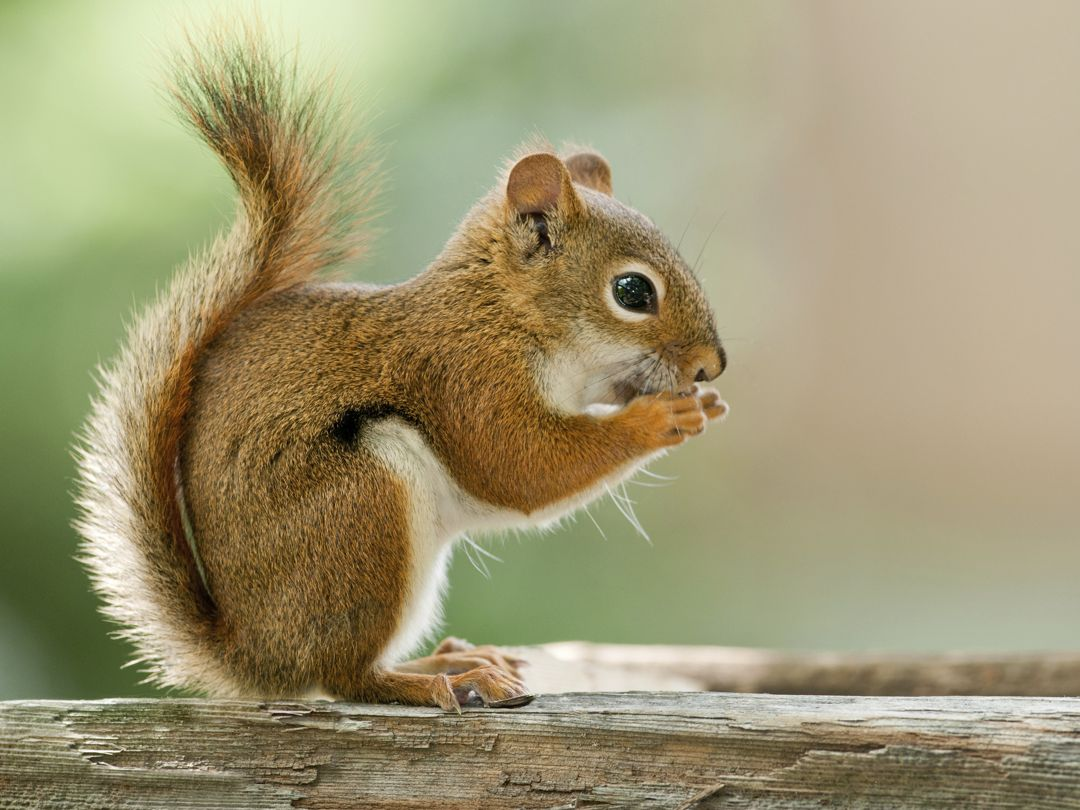

In [ ]:
from IPython.display import display, Image

# File gambar untuk uji coba
image_path = "/content/tupai.jpg"

# Melakukan inferensi
results = model.predict(
    source=image_path,
    save=True,            # Simpan hasil
    conf=0.5              # Confidence threshold
)

# Menampilkan hasil
result_image_path = results[0].path
display(Image(filename=result_image_path))



image 1/1 /content/anjing.jpg: 448x640 1 Anjing, 42.4ms
Speed: 2.9ms preprocess, 42.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/animals_yolov86


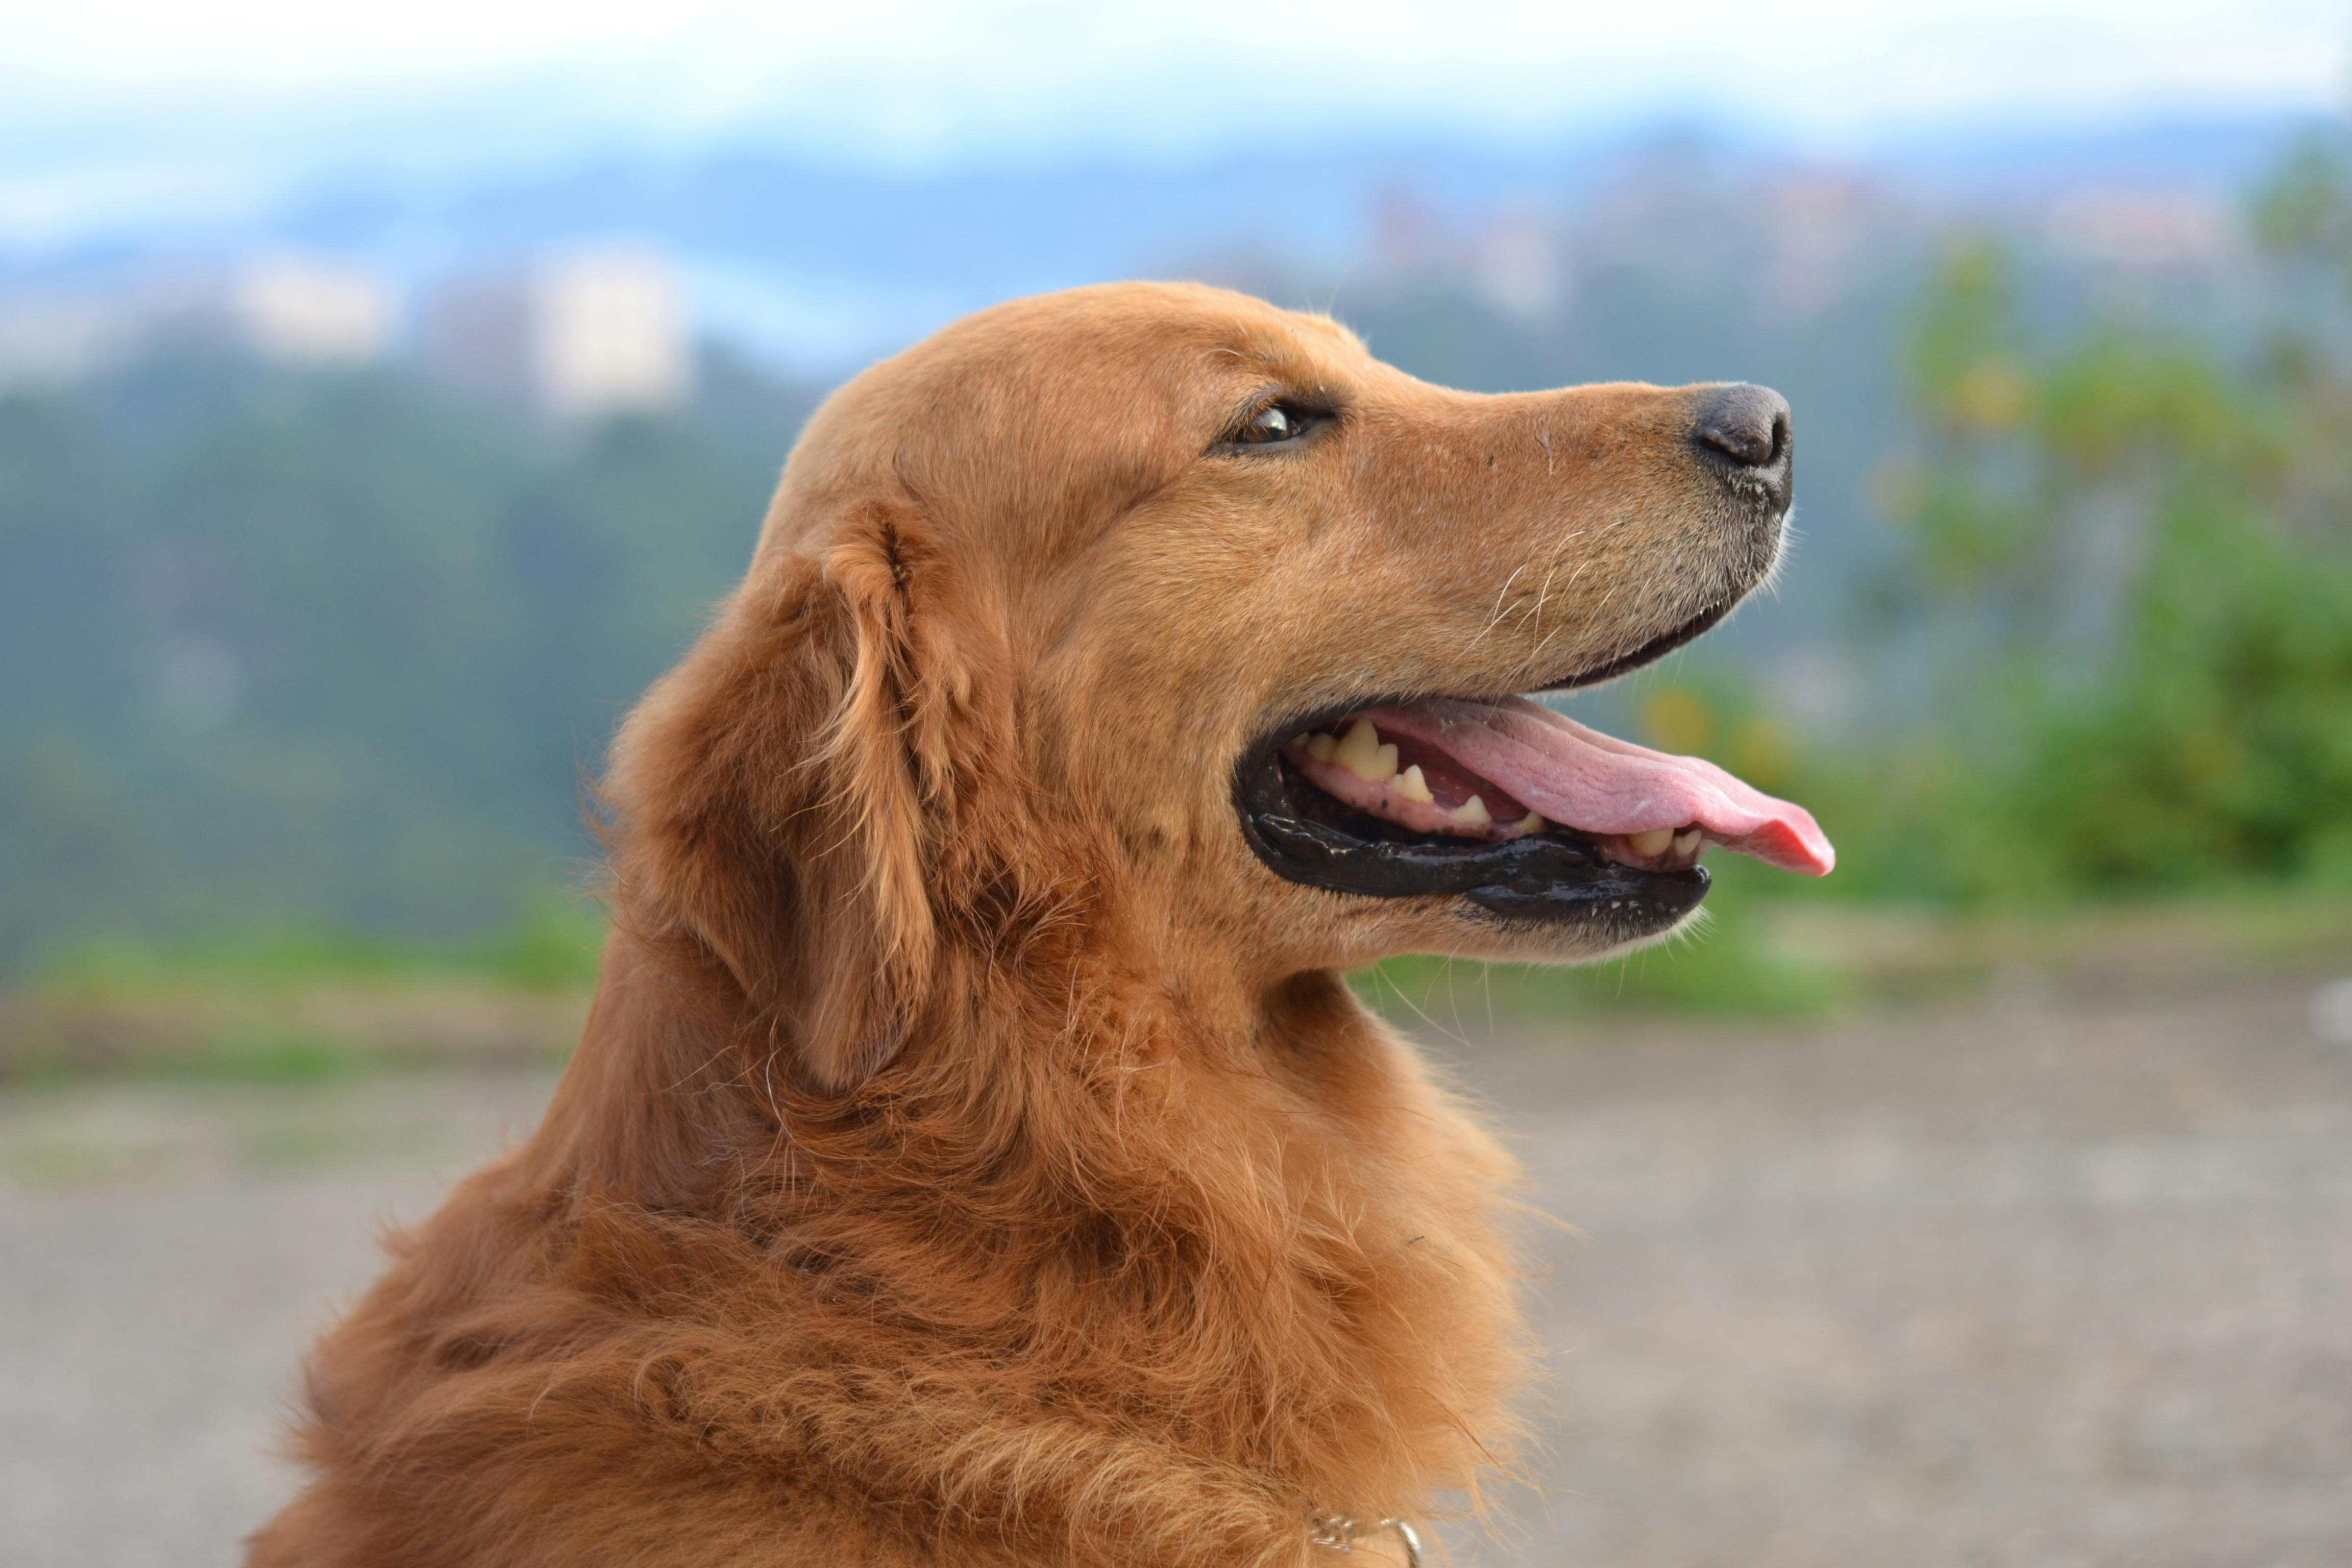

In [ ]:
# File gambar untuk uji coba
image_path = "/content/anjing.jpg"

# Melakukan inferensi
results = model.predict(
    source=image_path,
    save=True,            # Simpan hasil
    conf=0.5              # Confidence threshold
)

# Menampilkan hasil
result_image_path = results[0].path
display(Image(filename=result_image_path))



image 1/1 /content/gajah.jpg: 448x640 1 Gajah, 13.0ms
Speed: 2.4ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/animals_yolov87


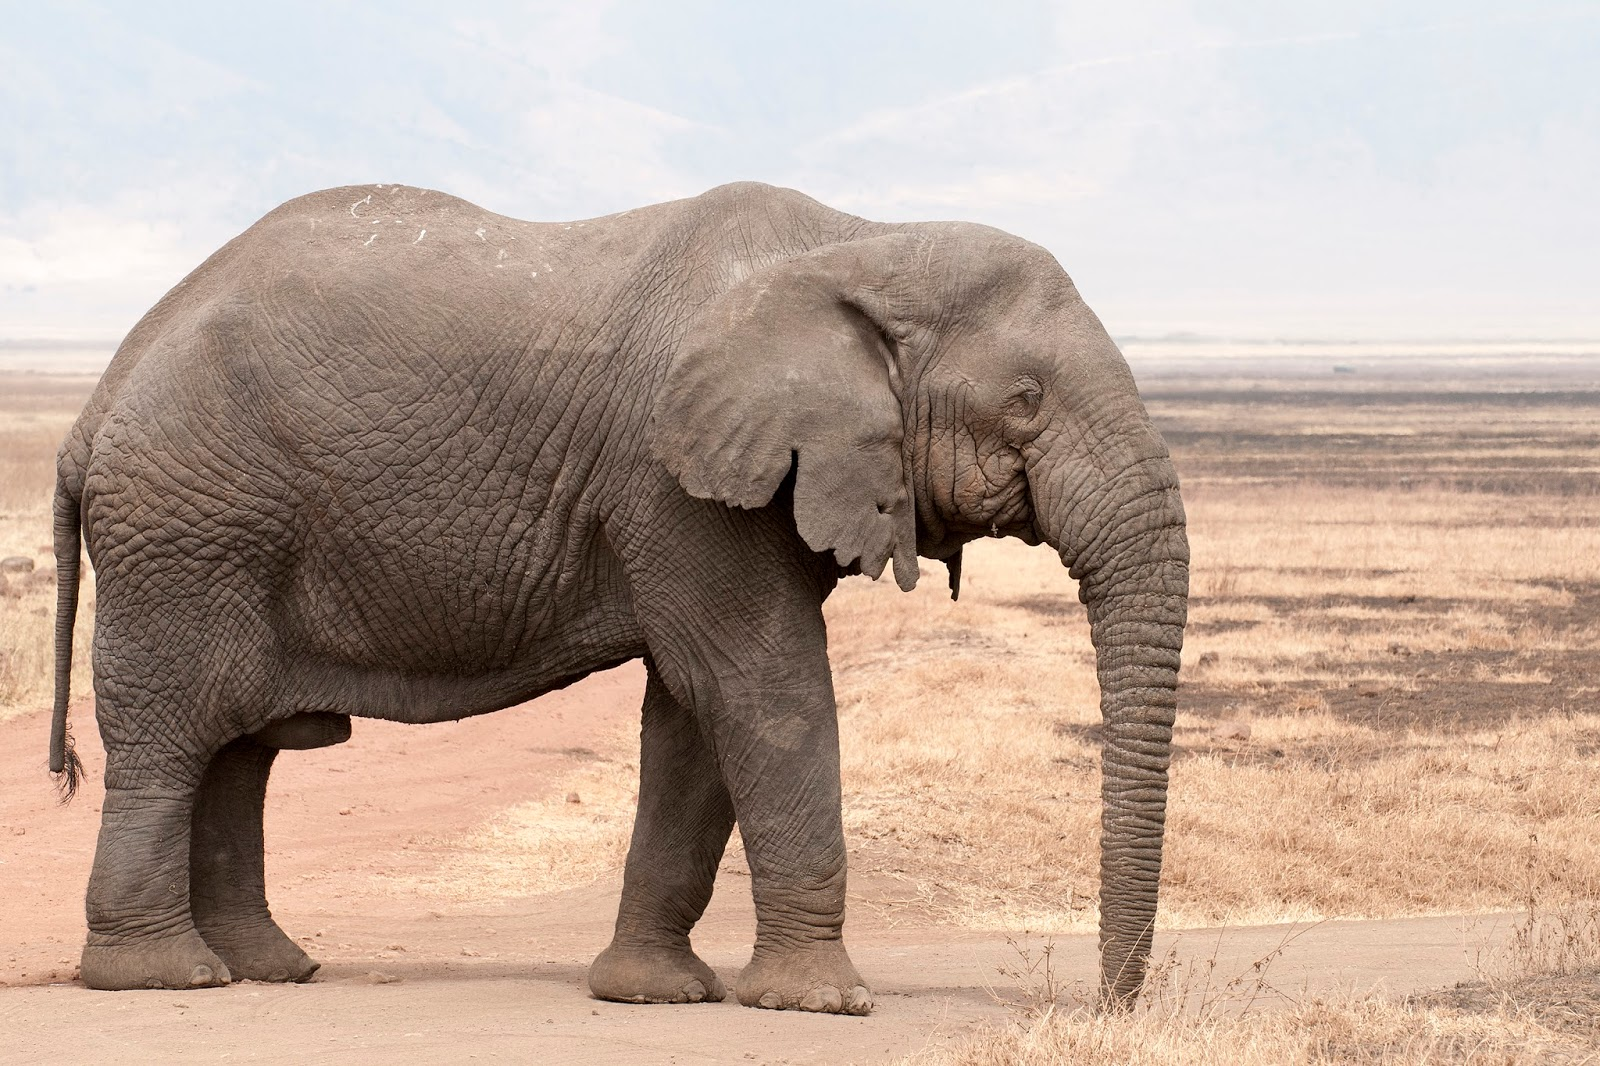

In [ ]:
# File gambar untuk uji coba
image_path = "/content/gajah.jpg"

# Melakukan inferensi
results = model.predict(
    source=image_path,
    save=True,            # Simpan hasil
    conf=0.5              # Confidence threshold
)

# Menampilkan hasil
result_image_path = results[0].path
display(Image(filename=result_image_path))


image 1/1 /content/kucing.jpeg: 384x640 1 Kucing, 47.4ms
Speed: 6.8ms preprocess, 47.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/animals_yolov88


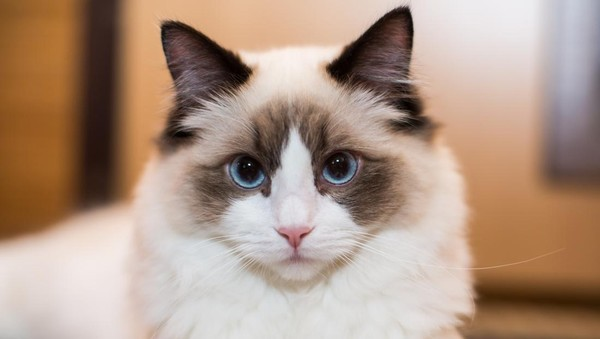

In [ ]:
# File gambar untuk uji coba
image_path = "/content/kucing.jpeg"

# Melakukan inferensi
results = model.predict(
    source=image_path,
    save=True,            # Simpan hasil
    conf=0.5              # Confidence threshold
)

# Menampilkan hasil
result_image_path = results[0].path
display(Image(filename=result_image_path))

### Draft

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Path ke dataset asal
# base_dir = "/content/drive/Animals-10"
# output_dir = "/content/drive/Animals-10-converted"

# # Folder target untuk dataset YOLO
# image_dir_train = os.path.join(output_dir, "images/train")
# image_dir_val = os.path.join(output_dir, "images/val")
# image_dir_test = os.path.join(output_dir, "images/test")
# label_dir_train = os.path.join(output_dir, "labels/train")
# label_dir_val = os.path.join(output_dir, "labels/val")
# label_dir_test = os.path.join(output_dir, "labels/test")

# # Buat direktori target
# for dir_path in [image_dir_train, image_dir_val, image_dir_test,
#                  label_dir_train, label_dir_val, label_dir_test]:
#     os.makedirs(dir_path, exist_ok=True)

# # Fungsi untuk memproses folder
# def process_class_folder(class_name):
#     class_path = os.path.join(base_dir, class_name)
#     images = [f for f in os.listdir(class_path) if f.endswith(".jpg")]
#     image_paths = [os.path.join(class_path, img) for img in images]
#     label_paths = [img.replace(".jpg", ".txt") for img in image_paths]

#     # Split data ke train, val, test
#     img_train, img_temp, lbl_train, lbl_temp = train_test_split(
#         image_paths, label_paths, test_size=0.3, random_state=42
#     )
#     img_val, img_test, lbl_val, lbl_test = train_test_split(
#         img_temp, lbl_temp, test_size=0.5, random_state=42
#     )

#     # Salin file ke folder target
#     for img, lbl in zip(img_train, lbl_train):
#         shutil.copy(img, image_dir_train)
#         shutil.copy(lbl, label_dir_train)
#     for img, lbl in zip(img_val, lbl_val):
#         shutil.copy(img, image_dir_val)
#         shutil.copy(lbl, label_dir_val)
#     for img, lbl in zip(img_test, lbl_test):
#         shutil.copy(img, image_dir_test)
#         shutil.copy(lbl, label_dir_test)

# # Proses setiap kelas di folder Animals-10
# classes = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
# for class_name in classes:
#     process_class_folder(class_name)

# # Simpan file YAML konfigurasi untuk YOLOv8
# yaml_content = f"""
# path: {output_dir}
# train: images/train
# val: images/val
# test: images/test
# names: {classes}
# """
# yaml_path = os.path.join(output_dir, "animals10.yaml")
# with open(yaml_path, "w") as yaml_file:
#     yaml_file.write(yaml_content)

# print("Dataset berhasil dikonversi ke format YOLO!")

In [ ]:
# from ultralytics import YOLO

# # Load model YOLOv8
# model = YOLO('yolov8s.pt')

# # Melatih model
# model.train(
#     data="/content/drive/Animals-10-converted/animals10.yaml",
#     epochs=100,
#     imgsz=640,
#     batch=16,
#     name="animals_yolov8"
# )

# # Melihat hasil pelatihan
# metrics = model.val()

In [ ]:
# # Evaluasi pada data validation
# metrics = model.val()
# print(metrics)  # Output berupa mAP (mean Average Precision)